# House Price Prediction Project



In [2]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
data = pd.read_csv('train.csv', index_col = 'Id')

In [6]:
print(data)

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
feature = ['LotArea' , 'YearBuilt' , '1stFlrSF' , '2ndFlrSF' ,
           'FullBath' , 'BedroomAbvGr' , "TotRmsAbvGrd"]

Text(0.65, 1.25, 'House price')

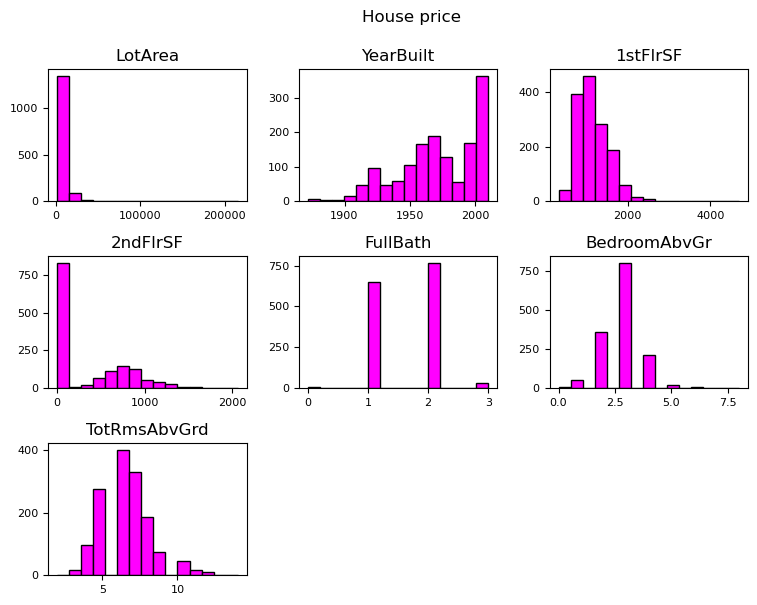

In [9]:
data[feature].hist(bins = 15, color='magenta' , edgecolor = 'black' , linewidth = 1,
                   xlabelsize = 8 , ylabelsize = 8, grid = False)

plt.tight_layout(rect = (0,0,1.2,1.2))

plt.suptitle ("House price", x = 0.65, y=1.25,fontsize = 12)

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


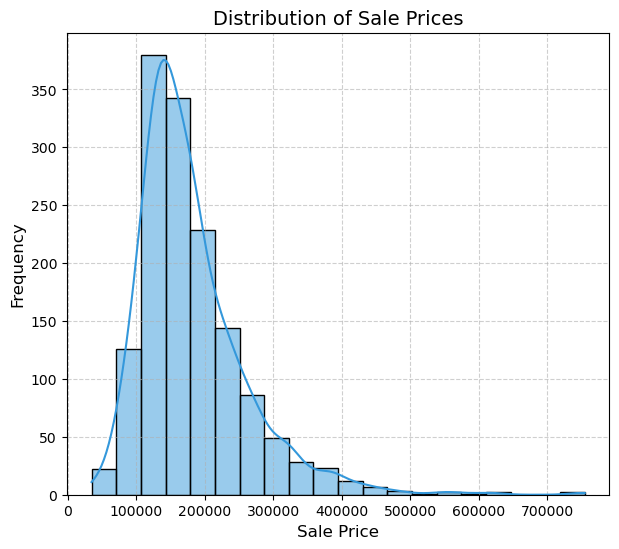

In [10]:
print(data['SalePrice'].describe())
plt.figure(figsize=(7, 6))
sns.histplot(data['SalePrice'], bins=20, color='#3498db', kde=True)
#sns.distplot(data['SalePrice'], color='#3498db', bins=100, hist_kws={'alpha': 0.4});
plt.xlabel('Sale Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Sale Prices', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

Text(0, 0.5, 'SalePrice')

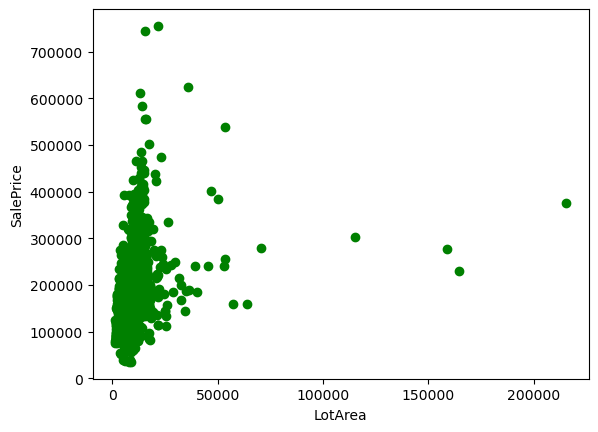

In [11]:
plt.scatter(data['LotArea'] , data['SalePrice'] , color = 'green')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')

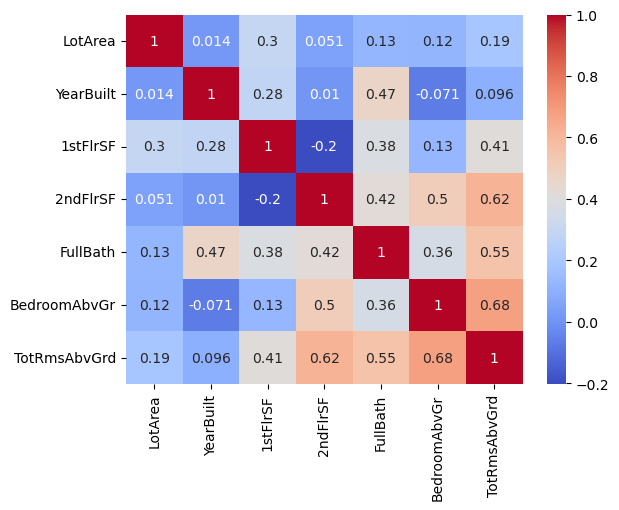

In [12]:
import seaborn as sns

# Tạo ma trận tương quan
corr_matrix = data[feature].corr()

# Vẽ heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Hiển thị figure
plt.show()

In [13]:
#  #Danh sách các cột feature cần vẽ
# feature = ['LotArea' , 'YearBuilt' , '1stFlrSF' , '2ndFlrSF' ,
#            'FullBath' , 'BedroomAbvGr' , "TotRmsAbvGrd"]

# num_cols = 2
# num_rows = len(feature) // num_cols + 1

# #Vẽ subplot
# fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))
# for i, feature in enumerate(feature):
#    row = i // num_cols
#    col = i % num_cols
#    axs[row, col].scatter(data[feature], data['SalePrice'] , color = 'seagreen')
#    axs[row, col].set_xlabel(feature)
#    axs[row, col].set_ylabel('Sale Price')
# plt.show()

In [14]:
X = data[feature]
y = data['SalePrice']

In [15]:
X.head(5)

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,
1,8450,2003,856,854,2,3,8
2,9600,1976,1262,0,2,3,6
3,11250,2001,920,866,2,3,6
4,9550,1915,961,756,1,3,7
5,14260,2000,1145,1053,2,4,9


In [16]:
y.head()

Id
1    208500
2    181500
3    223500
4    140000
5    250000
Name: SalePrice, dtype: int64

# X,y -> X_train , y_train , X_test , y_test

In [17]:
from sklearn.model_selection import train_test_split

X_train , X_test ,y_train, y_test = train_test_split(X,y , train_size = 0.8 , test_size = 0.2 , random_state = 0)

In [18]:
X_train.shape, X_test.shape

((1168, 7), (292, 7))

# Training

## DecisionTreeRegressor

In [19]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state = 1)

In [20]:
# Fit training data model
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [21]:
y_preds = dt_model.predict(X_test.head())

In [22]:
y_preds

array([335000., 140200., 119000., 207500., 112000.])

In [23]:
pd.DataFrame({'y':y_test.head(), 'y_preds':y_preds})

,y,y_preds
Id,,
530,200624,335000.0
492,133000,140200.0
460,110000,119000.0
280,192000,207500.0
656,88000,112000.0


In [24]:
dt_model.score(X_test , y_test)

0.5325376245236801

## RandomForestRegressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state = 1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [26]:
rf_val_preds = rf_model.predict(X_test.head())

In [27]:
rf_val_preds[:5]

array([271690., 155039., 122024., 188915.,  91147.])

In [28]:
X_test.head()
y_test

Id
530     200624
492     133000
460     110000
280     192000
656      88000
         ...  
327     324000
441     555000
1388    136000
1324     82500
62      101000
Name: SalePrice, Length: 292, dtype: int64

In [29]:
X = rf_model.predict([[2000 , 2023 , 1500 , 1000 , 3 , 4 , 8]])
print(X)

[337551.07]


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [30]:
X = rf_model.predict([[32668 , 1957 , 2515 , 0 , 3 , 4 , 9]])
print(X)
#200624

[271690.]


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [31]:
pd.DataFrame({'y':y_test.head(), 'rf_preds':rf_val_preds})

,y,rf_preds
Id,,
530,200624,271690.0
492,133000,155039.0
460,110000,122024.0
280,192000,188915.0
656,88000,91147.0


In [32]:
rf_model.score(X_test , y_test)

0.7842596223072973

## LogisticRegression

In [33]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver = 'liblinear' , max_iter=1000)
log_reg.fit(X_train , y_train)

log_reg.score(X_test , y_test)

0.017123287671232876

In [34]:
log_reg_pred = log_reg.predict(X_test.head())
pd.DataFrame({'y':y_test.tail(), 'log_reg_pred':log_reg_pred})

,y,log_reg_pred
Id,,
327,324000,171000
441,555000,140000
1388,136000,140000
1324,82500,200000
62,101000,83500


## GradientBoostingRegressor

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)
gb.fit(X_train , y_train)
y_pred = gb.predict(X_test.head())
y_pred

array([252406.60931586, 139100.41560644, 115411.91411554, 198259.850638  ,
        93530.2517255 ])

In [50]:
pd.DataFrame({'y':y_test.head(), 'y_pred':y_pred})

,y,y_pred
Id,,
530,200624,252406.609316
492,133000,139100.415606
460,110000,115411.914116
280,192000,198259.850638
656,88000,93530.251725


In [51]:
gb.score(X_test , y_test)

0.8340283064792506

# 

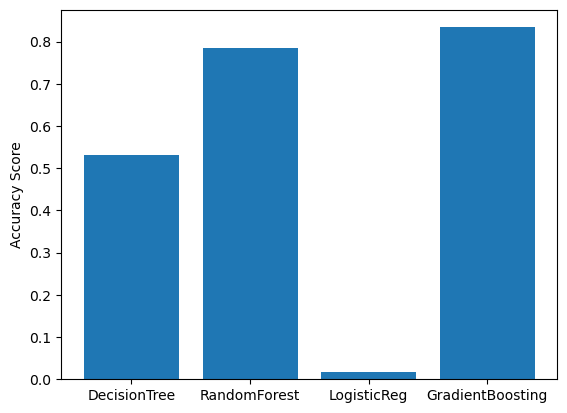

In [38]:
scores = [dt_model.score(X_test, y_test),rf_model.score(X_test, y_test),log_reg.score(X_test, y_test), gb.score(X_test, y_test)]

models = ['DecisionTree', 'RandomForest', 'LogisticReg', 'GradientBoosting']

plt.bar(models, scores)

plt.ylabel('Accuracy Score')

plt.show()

0.8340283064792506